# Exercícios da biblioteca SciPy

## Problema 1
Para se calcular o custo de uma torre de destilação são usadas as seguintes equações:
#### Ct = Nt.Fnt.Ftt.Ftm.Cbt
#### Cbt = 468.exp(0,1739.Di)
#### Ftm = 1,401 + 0,0724.Di
#### W = pi.(Di + ts).(l + 0,8.Di).ts.p
#### Cv = exp(7,2756 + 0,18255.ln(W) + 0,02297.(ln(w))²)
#### Cpl = 300,9.(Di)^0,63316.(l)^0,80161
#### Cpc = Fm.Cv + Cpl
Onde,
#### Ct: custo dos pratos, em dólares;
#### Nt: número de estágios na coluna, sendo 31 estágios para coluna T-802;
#### Fnt: fator do número de pratos, adimensional, 1,0 para Nt>20;
#### Ftt: fator do tipo de prato, adimensional, 1,0 para prato Sieve;
#### Ftm: fator do material de construção do prato aplicada para aço inoxidável;
#### Cbt: custo base dos pratos, em dólares:
#### Di: diâmetro interno, medido em ft (pés);
#### Fm: fator para material de construção do vaso, adimensional, sendo 2,10 para aço inoxidável;
#### W: massa do corpo da coluna, em lb;
#### ts: espessura do vaso, em polegadas;
#### l: comprimento, em polegadas;
#### p: densidade do material de construção, em libras por polegadas ao cubo;
#### Cv: custo do vaso vazio, em dólares;
#### Cpl: custo das escadas e plataformas, em dólares;
#### Cpc: custo da torre, em dólares

Calcule o valor das variáveis Nt, Di e l para que o custo total seja mínimo, considerando coluna T-802, pratos Sieve, material de aço inoxidável, espessura do vaso de 40 in, densidade de 0,289 lb/in³ e a seguinte restrição:
#### Nt.Di.l >= 20000
#### Equação do custo total: C = Ct + Cpc
#### Considere, como chutes iniciais, os valores de 10, 15 e 10 para, respectivamente, Nt, Di e l.

In [131]:
from scipy.optimize import minimize

#Fazendo as substituições na equação do custo total e criando a função, temos:
def objetivo(x):
    fnt = 1.0 #nt acima de 20
    ftt = 1.0 #pratos Sieve
    ts = 40 #in
    p = 0.289 #lb/in³
    fm = 2.10 #para aço inoxidável

    nt = x[0]
    di = x[1]
    l = x[2]

    #Equação do custo dos pratos
    ct = nt*fnt*ftt*(1.401+0.0724*di)*468*np.exp(0.1739*di)

    #Equação para o custo da torre
    w = math.pi*(di+ts)*(l+0.8*di)*ts*p
    cpl = 300.9*(di**0.63316)*(l**0.80161)
    cv = np.exp(7.2756+0.18255*np.log(w)+0.02297*(np.log(w))**2)
    cpc = fm*cv+cpl

    objetivo = ct + cpc #Equação de custo total
    return objetivo

#Como o problema possui restrições, usaremos o método COBYLA
def condicao(x):
    nt = x[0]
    di = x[1]
    l = x[2]
    return nt*di*l-20000

x0 = [10, 15, 10]

cond = {'type': 'ineq', 'fun': condicao}

custo = minimize(objetivo, x0, method='COBYLA', constraints = cond)
custo


     fun: 606842.8586983823
   maxcv: 2.614724508021027e-07
 message: 'Optimization terminated successfully.'
    nfev: 967
  status: 1
 success: True
       x: array([159.91078913,   3.67304559,  34.05068953])

## Problema 2
Suponha que um gás ideal a 300 K e 200 kPa está confinado em um cilindro mediante um pistão sem fricção, e que o gás empurra lentamente o pistão de modo que o volume  do gás se expande de 0,1 até 0,2 m³. Observe a figura abaixo e calcule o trabalho realizado pelo gás sobre o pistão (a única parte da fronteira que se move), considerando que se seguem dois caminhos distintos para ir do estado inicial até o estado final. Considere R = 8,314 kPa.m³/kmol.K

#### Trajetoria A: a expansão se realiza à pressão constante (p = 200 kPa)
#### Trajetoria B: a expansão se realiza à temperatura constante (T = 300 K)

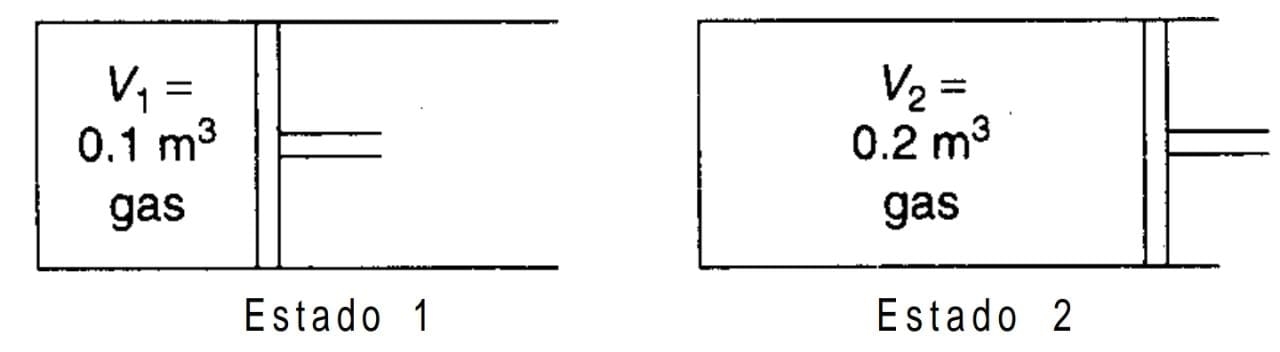

In [120]:
from IPython.display import Image
Image(filename='img3.jpeg')

In [135]:
import scipy.integrate as integrate

#Dados do problema
p = 200 #kPa
T = 300 #K
R = 8.3141 #kPa.m³/kmol.K
V1 = 0.1 #m³
V2 = 0.2 #m³

#Trajetória A
trabalho1 = (-1)*(integrate.quad(lambda dV: p, V1, V2)[0])
print('Trabalho, em kJ, da trajetória A: '+str(trabalho1))

#Trajetória B
'''
Isolando a pressão na fórmula: pV = nRT, temos que: p = nRT/V
Substituímos p na fórmula do trabalho e calculamos o valor de n.'''
n = p*V1/(T*R)

trabalho2 = (-1)*(integrate.quad(lambda V: n*R*T/V, V1, V2)[0])
print('Trabalho, em kJ, da trajetória B: '+str(trabalho2))

Trabalho, em kJ, da trajetória A: -20.0
Trabalho, em kJ, da trajetória B: -13.862943611198908


## Problema 3
A variação do coeficiente de expansão térmica do alumínio na faixa de 0 a 100°C é dada pela equação abaixo. Calcule os valores da interpolação para o intervalo de temperatura mencionado, considerando o passo igual a 10, ou seja, um intervalo indo de 0 a 100, variando de 10 em 10.

#### k(T) = 0,22.10e-4.T + 0,009.10e-6.T² com T: °C

In [132]:
import numpy as np
from scipy import interpolate

#Função do coeficiente de expansão térmica do alumínio
def k(t):
    return 0.22*10e-4*t + 0.009*10e-6*t**2

#Intervalo de temperatura
x = np.arange(0,100)

#Transformando a função escalar do coeficiente em uma função vetorial
k_vet = np.vectorize(k)
y = k_vet(x)

#Fazendo a interpolação
f = interpolate.interp1d(x,y)

#Calculando os valores da interpolação para o intervalo desejado
xnew = np.arange(0,100,10)
ynew = f(xnew)

print('Os valores interpolados para o intervalo desejado são: '+str(ynew.round(4)))

Os valores interpolados para o intervalo desejado são: [0.     0.0022 0.0044 0.0067 0.0089 0.0112 0.0135 0.0158 0.0182 0.0205]
